### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



### Trabalho 01: Comparação do perceptron criterion com hinge-loss

Para concluir a atividade proposta de comparar o Perceptron criterion com Hinge-loss, primeiro é gerado um dataset de 2 dimensões (todos os pontos com x1 > x2 pertencem à classe positiva, e todos os pontos com x1 <= x2 pertencem à classe negativa).

Então, é criado uma função para gerar o dataset com 20 pontos aleatorios dentro de uma unidade quadrada no quadrante positivo. Rotulando cada ponto dependendo se x1 é maior do que x2, ou não.

Segue abaixo a função geradataset seguido dos dados de treino:


In [22]:
#Função gerar dataset de treino linearmente separável
import numpy as np

def geradataset(tamanho=20):
  X = np. random.uniform(size=(tamanho,2)) #X aleatório com dataset com 20 instâncias e 2 características
  y = np.array(X[:,0]>X[:,1],dtype=int)*2-1  #y(rótulo) 
  return X,y

print("Gerando o dataset de treino:")
print()

X,y = geradataset(20)
X,y


Gerando o dataset de treino:



(array([[0.79737977, 0.58510168],
        [0.74690481, 0.54485262],
        [0.41072101, 0.08504045],
        [0.25226101, 0.18646455],
        [0.1208125 , 0.5294762 ],
        [0.77011316, 0.36472636],
        [0.45003288, 0.67219244],
        [0.06123781, 0.89744271],
        [0.42133395, 0.19829128],
        [0.7575449 , 0.51417929],
        [0.46732244, 0.26686253],
        [0.53633891, 0.99899806],
        [0.20366778, 0.46328196],
        [0.24917461, 0.80274372],
        [0.68003716, 0.95750168],
        [0.82413378, 0.71500345],
        [0.95997289, 0.85264229],
        [0.49633104, 0.61618966],
        [0.99259791, 0.8790952 ],
        [0.61769011, 0.9537996 ]]),
 array([ 1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        -1,  1, -1]))

Assim, o separador entre as duas classes é um hiperplano linear definido por x1 - x2 = 0. 

Abaixo temos a função que plota o dataset gerado, uma função que plota o vetor que vai separar os dados, além da função do vetor perpenticular ao hiperplano.

Temos então uma base de dados linearmente separável.

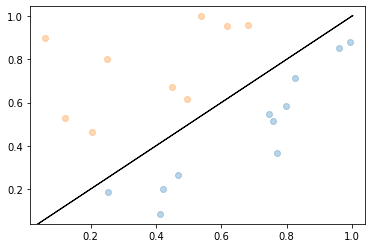

In [23]:
#2. Função plotar dataset de treino (hiperplano separador) 

import matplotlib.pyplot as plt

def plotadataset(X,y):   #função plota o dataset
    for k in set(y):
       plt.plot(X[:,0][y==k],X[:,1][y==k],"o",alpha=0.3)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

vetor = [1, -1]

plotadataset(X,y)
hiperplano = perpendicular(vetor)
plotavetor(hiperplano)

Dado o exemplo acima, foi gerado um dataset de treino com 20 pontos.



Com base no treino de 20 pontos, será gerado um novo dataset, agora com 1000 pontos de teste, e vamos analisar os seus respectivos gráficos dataset de treino e dataset de teste

dataset de treino com 20 pontos


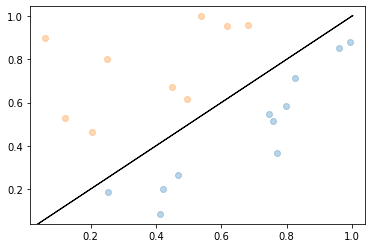


dataset de teste com 1000 pontos


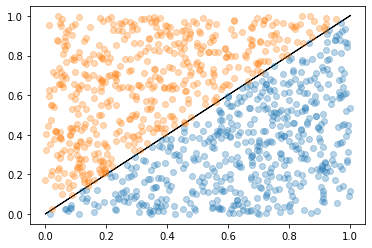

In [24]:
#Gerando os dados de teste
Xte, yte = geradataset(1000)

print("dataset de treino com 20 pontos")
plotadataset(X, y)
hiperplano = perpendicular(vetor)
plotavetor(hiperplano)
plt.show()
print()
print("dataset de teste com 1000 pontos")
plotadataset(Xte, yte)
hiperplano = perpendicular(vetor)
plotavetor(hiperplano)
plt.show()

Gerando os dados de teste e treino, podemos começar com a implementalção do perceptron.

Conforme mostrado abaixo, temos uma implementação da classe perceptron, assim como a função custo perceptron e também do algoritmo Hinge Loss

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
  @staticmethod
  def erro(y,ypred):
    return y - ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum(CustoPerceptron.erro(y,ypred)**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(CustoPerceptron.erro(y,ypred),X)

class HingeLoss():
  @staticmethod
  def erro(y,ypred):
    return np.multiply(y,ypred)
  @staticmethod
  def custo(y,ypred):
    return np.sum(1 - HingeLoss.erro(y,ypred))
  @staticmethod
  def gradiente(y,ypred, X):
    marginais =  HingeLoss.erro(y,ypred) < 1
    return np.matmul(y[marginais],X[marginais])


class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo
  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=2)
    for _ in range(self.maxiter):
      ypred = self.predict(X)
      custo = self.custo.custo(y,ypred)
      self.w = self.w + self.alpha*self.custo.gradiente(y,ypred,X)
      if custo == 0:
         break
  def predict(self,X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)
    return ypred



Perceptron treinando e convergindo a essa base de dados que é linearmente separável:




In [26]:
perceptron = Perceptron()
perceptron.fit(X,y)
ypred = perceptron.predict(X)
print(f"Acurácia: {sum(y == ypred)/len(y)}")

Acurácia: 1.0


Logo abaixo temos as funções de custo do critério do perceptron e também do hinge-loss. Com a base de dados de teste e treino gerados.



Perceptron Criterion

Acurácia: 0.968
[ 1.8491856  -1.72260335]


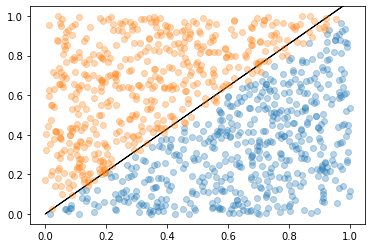


Perceptron HingeLoss

Acurácia: 0.993
[ 0.91781531 -0.93575468]


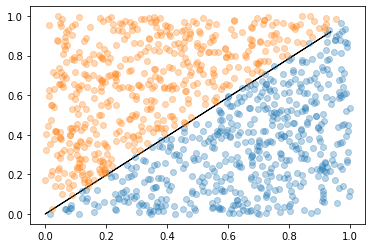

In [27]:
print("Perceptron Criterion")
print("")
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)

ypred = perceptron.predict(Xte)
print(f"Acurácia: {sum(yte == ypred)/len(yte)}")
plotadataset(Xte, yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()

print("")

print("Perceptron HingeLoss")
print("")
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)

ypred = perceptron.predict(Xte)
print(f"Acurácia: {sum(yte == ypred)/len(yte)}")
plotadataset(Xte, yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()



Análise de como vai se comportar as funções de custo do perceptron criterion e Hing-Loss com um novo treinamento de dados


Novos dados dataset de treino com 20 pontos

Perceptron Criterion
Acurácia: 0.911
[ 1.21967685 -1.47466293]


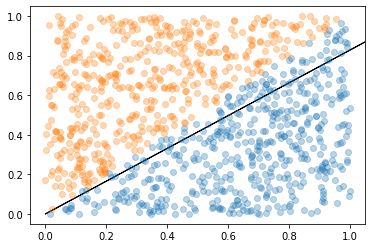


Perceptron HingeLoss
Acurácia: 0.978
[ 0.47493254 -0.50079591]


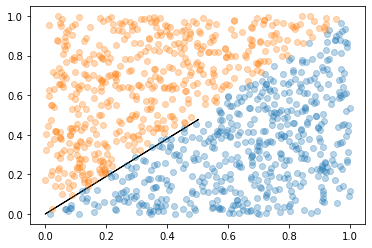

In [32]:
print("Novos dados dataset de treino com 20 pontos")
X, y = geradataset(20)

## Perceptron Criterion
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)

ypred = perceptron.predict(Xte)
print("")
print("Perceptron Criterion")
print(f"Acurácia: {sum(yte == ypred)/len(yte)}")

plotadataset(Xte, yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()


## Percetron Hingloss
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)

ypred = perceptron.predict(Xte)
print("")
print("Perceptron HingeLoss")
print(f"Acurácia: {sum(yte == ypred)/len(yte)}")

plotadataset(Xte, yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))
plt.show()




#Conclusão:

De acordo com os estudos apresentados, dependendo da base de dados que for gerada, o valor da acurácia vai mudar. No meu esforço, e pelas execuções que fiz, na maioria das vezes, o algoritmo Hinge Loss foi mais eficaz e teve uma melhor acurácia. Assim como também teve um melhor desempenho com o treinamento de novos dados gerados. Poucas vezes apresentou resultados parecidos e até piores que o Criterion Perceptron

Com isso, podemos deduzir que a depender desses dados gerados e distribuídos pelo dataset, pode acontecer de ter casos que o algoritmo Criterion Perceptron seja melhor que o Hinge Loss ou até mesmo apresentar resultados bem próximos. 
